# Analisis Exploratorio

In [1]:
# Importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train_labels = pd.read_csv('../data/train_labels.csv', low_memory=False)
df_train_values = pd.read_csv('../data/train_values.csv', low_memory=False)

In [3]:
df_train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [4]:
df_train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


## Preprocesamiento y limpieza de datos

In [128]:
df_buildings = pd.merge(df_train_labels, df_train_values, how='inner', on='building_id')
df_buildings.set_index('building_id', inplace=True)
df_buildings.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
28830,2,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
94947,3,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
590882,2,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
201944,3,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df_buildings.isnull().sum()

damage_grade                              0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

Vemos que no tenemos ningún tipo de nulos en ninguna de los features. Además, podemos optimizar el uso de memoria en todos los features teniendo en cuenta su valor máximo y mínimo, o si son categóricos o no.

In [130]:
df_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   damage_grade                            260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-

In [8]:
# Conversion de tipos de datos
to_categorical = set(df_buildings.select_dtypes(include='object').columns.tolist())
to_bool = set([col for col in df_buildings.columns if 'has' in col])
to_numeric = set(df_buildings.select_dtypes(include='int64').columns.tolist()) - to_bool

for col in to_categorical:
    df_buildings[col] = df_buildings[col].astype('category')

for col in to_bool:
    df_buildings[col] = df_buildings[col].astype('bool')

for col in to_numeric:
    df_buildings[col] = pd.to_numeric(df_buildings[col], downcast='unsigned')


In [9]:
df_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  uint32  
 1   damage_grade                            260601 non-null  uint8   
 2   geo_level_1_id                          260601 non-null  uint8   
 3   geo_level_2_id                          260601 non-null  uint16  
 4   geo_level_3_id                          260601 non-null  uint16  
 5   count_floors_pre_eq                     260601 non-null  uint8   
 6   age                                     260601 non-null  uint16  
 7   area_percentage                         260601 non-null  uint8   
 8   height_percentage                       260601 non-null  uint8   
 9   land_surface_condition                  260601 non-null  category
 10  foundation_type                 

Algo que llama la atención es la columna *has_secondary_use*, que puede ser redundante teniendo en cuenta que además existen columnas de tipo especifico de
secondary use.

In [10]:
secondary_use = set([col for col in df_buildings.columns if 'has_secondary' in col])
df_buildings.loc[df_buildings['has_secondary_use'] == 0, df_buildings.columns.isin(secondary_use)].shape[0]

231445

In [11]:
df_buildings.loc[df_buildings['has_secondary_use'] == 0, df_buildings.columns.isin(secondary_use)].sum()

has_secondary_use                0
has_secondary_use_agriculture    0
has_secondary_use_hotel          0
has_secondary_use_rental         0
has_secondary_use_institution    0
has_secondary_use_school         0
has_secondary_use_industry       0
has_secondary_use_health_post    0
has_secondary_use_gov_office     0
has_secondary_use_use_police     0
has_secondary_use_other          0
dtype: int64

Vemos que de los 231.445 edificios que no tienen un uso secundario, tampoco tiene un uso secundario especifico. Por lo tanto, para estos edificios la feature *has_secondary_use* resulta redundante.

Ahora, vamos a analizar para los casos que SI tienen un uso secundario.

In [12]:
df_buildings.loc[df_buildings['has_secondary_use'] == 1, df_buildings.columns.isin(secondary_use)].shape[0]

29156

In [13]:
df_buildings.loc[df_buildings['has_secondary_use'] == 1, df_buildings.columns.isin(secondary_use)].drop(columns='has_secondary_use').sum().sum()

29713

Podemos apreciar que de los 29.156 edificios que tienen un uso secundario, tenemos 29.713 usos secundarios en total. Esta diferencia de 557 puede venir de que algunos edificios tengan más de un uso secundario especifico.

In [14]:
aux = df_buildings.loc[df_buildings['has_secondary_use'] == 1, df_buildings.columns.isin(secondary_use - set(['has_secondary_use']))]

In [15]:
aux = df_buildings.loc[df_buildings['has_secondary_use'] == 1, df_buildings.columns.isin(secondary_use - set(['has_secondary_use']))]
aux['sum_has_secondary_use'] = aux.sum(axis=1)
aux.head()

,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,sum_has_secondary_use
5,True,False,False,False,False,False,False,False,False,False,1
20,True,False,False,False,False,False,False,False,False,False,1
26,True,False,False,False,False,False,False,False,False,False,1
45,False,False,True,False,False,False,False,False,False,False,1
57,True,False,False,False,False,False,False,False,False,False,1


In [16]:
aux.loc[aux['sum_has_secondary_use'] > 1, :].shape[0]

557

Finalmente, vemos que efectivamente, la diferencia hallada provenia de aquellos edificios que tienen mas de un uso especifico. Por lo tanto, para estos edificios la feature *has_secondary_use* tambien resulta redundante.

Podemos eliminar dicha feature ya que no nos aporta nada.

In [17]:
df_buildings.drop('has_secondary_use', axis=1, inplace=True)

In [18]:
df_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  uint32  
 1   damage_grade                            260601 non-null  uint8   
 2   geo_level_1_id                          260601 non-null  uint8   
 3   geo_level_2_id                          260601 non-null  uint16  
 4   geo_level_3_id                          260601 non-null  uint16  
 5   count_floors_pre_eq                     260601 non-null  uint8   
 6   age                                     260601 non-null  uint16  
 7   area_percentage                         260601 non-null  uint8   
 8   height_percentage                       260601 non-null  uint8   
 9   land_surface_condition                  260601 non-null  category
 10  foundation_type                 

## Analisis por estructura de edificios

Comenzamos por un analisis cuantitativo, queremos ver que con qué material fueron construidos los edificios. Buscaremos analizar si dichos materiales tuvieron o no incidencia en el nivel de daño recibido.

In [19]:
has_superstructure = set([col for col in df_buildings.columns if 'has_superstructure' in col])
only_superstructure = df_buildings.loc[:, has_superstructure]
only_superstructure.head()

,has_superstructure_stone_flag,has_superstructure_cement_mortar_brick,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_stone,has_superstructure_rc_engineered,has_superstructure_other,has_superstructure_adobe_mud,has_superstructure_timber,has_superstructure_rc_non_engineered,has_superstructure_bamboo,has_superstructure_mud_mortar_brick
0,False,False,True,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,True,False,True,False
4,False,False,False,False,False,False,True,False,False,False,False


In [20]:
only_superstructure['cant_materiales'] = only_superstructure.sum(axis=1, numeric_only=True)

In [21]:
only_superstructure.head()

,has_superstructure_stone_flag,has_superstructure_cement_mortar_brick,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_stone,has_superstructure_rc_engineered,has_superstructure_other,has_superstructure_adobe_mud,has_superstructure_timber,has_superstructure_rc_non_engineered,has_superstructure_bamboo,has_superstructure_mud_mortar_brick,cant_materiales
0,False,False,True,False,False,False,True,False,False,False,False,2
1,False,False,True,False,False,False,False,False,False,False,False,1
2,False,False,True,False,False,False,False,False,False,False,False,1
3,False,False,True,False,False,False,False,True,False,True,False,3
4,False,False,False,False,False,False,True,False,False,False,False,1


In [27]:
cantidad_por_estructura = only_superstructure[has_superstructure].sum().sort_values(ascending=False)
cantidad_por_estructura = cantidad_por_estructura.rename(lambda x: x.replace('has_superstructure_', ''))
cantidad_por_estructura

mud_mortar_stone       198561
timber                  66450
adobe_mud               23101
bamboo                  22154
cement_mortar_brick     19615
mud_mortar_brick        17761
rc_non_engineered       11099
stone_flag               8947
cement_mortar_stone      4752
rc_engineered            4133
other                    3905
dtype: int64

In [69]:
cantidad_por_estructura.sum()

380478

In [28]:
# Ojo aca!, divido por la cantidad total de viviendas para saber el % sobre ese espacio.
# Es decir, 76% es sobre el total de viviendas, 25% es sobre el total de viviendas... y la suma de todos los porcentajes es mayor al 100%
# debido a que estas estructuras NO son excluyentes --> una vivienda puede tener mas de una estructura
cantidad_por_estructura / df_buildings.shape[0]

mud_mortar_stone                      0.76
timber                                0.25
adobe_mud                             0.09
bamboo                                0.09
cement_mortar_brick                   0.08
mud_mortar_brick                      0.07
rc_non_engineered                     0.04
stone_flag                            0.03
cement_mortar_stone                   0.02
rc_engineered                         0.02
other                                 0.01
dtype: float64

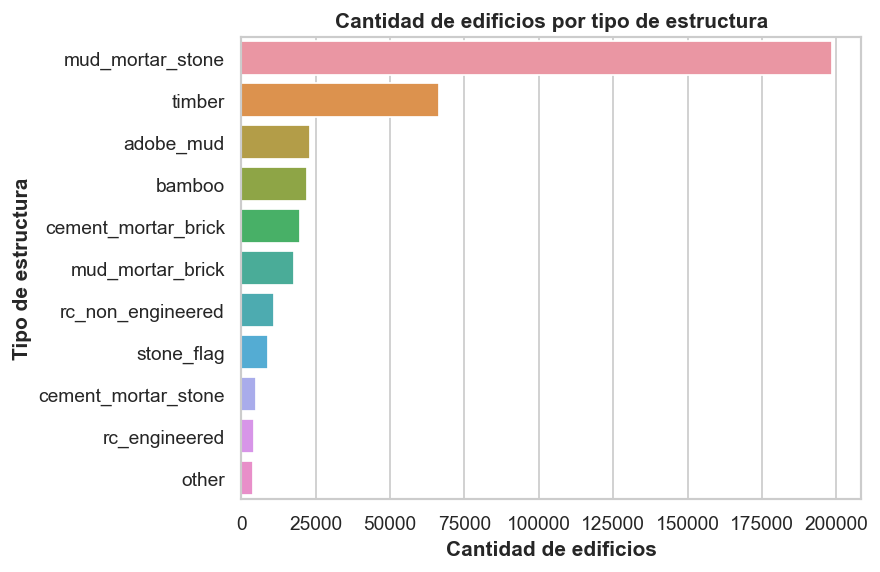

In [29]:
plt.figure(dpi=125)
sns.barplot(y=cantidad_por_estructura.index, x=cantidad_por_estructura.values, orient='h')
plt.ylabel("Tipo de estructura", weight='bold')
plt.xlabel("Cantidad de edificios", weight='bold')
plt.title("Cantidad de edificios por tipo de estructura", weight='bold')
plt.show()

Podemos ver que la gran mayoria (76%) de las edificaciones totales utilizaron barro-piedra para su construccion, 25% fueron construidas con Timber (madera especifica para construccion) seguido de un 9% con adobe-barro y bamboo y un 8% con cemento-ladrillo. Estas categorias no son excluyentes, es decir, hay viviendas que fueron contruidas con barro-piedra y por ejemplo se utilizó timber para soporte interno. Todos estos datos tienen concordancia con lo que se ve de Nepal a nivel nacional, fuera del contexto del terremoto.

Como observacion, recien al final de la decada de 1970 se empezó a construir viviendas con concreto reforzado, y por eso las pocas que hay construidas son en su mayoría de concreto reforzado no diseñado.

A continuación, veremos si en estos 5 primeros tipos de materiales podemos hallar algún tipo de incidencia respecto del daño recibido, ya que son las edificaciones con mayor cantidad de datos.

In [53]:
only_superstructure['cant_materiales'].value_counts()

1    176016
2     57838
3     20210
4      4925
5      1259
6       314
7        35
8         4
Name: cant_materiales, dtype: int64

In [31]:
cantidad_por_cantidad_de_materiales = only_superstructure['cant_materiales'].value_counts()
cantidad_por_cantidad_de_materiales = 100 * cantidad_por_cantidad_de_materiales / cantidad_por_cantidad_de_materiales.sum()
cantidad_por_cantidad_de_materiales

1                  67.54
2                  22.19
3                   7.76
4                   1.89
5                   0.48
6                   0.12
7                   0.01
8                   0.00
Name: cant_materiales, dtype: float64

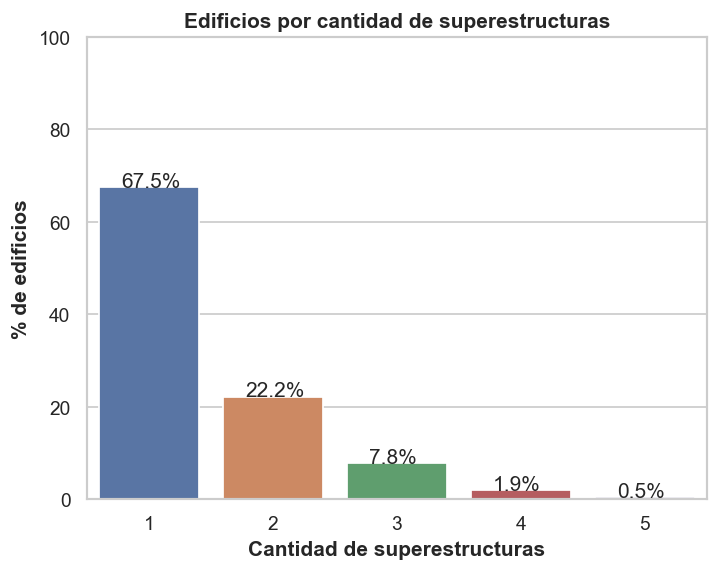

In [45]:
# Graficamos solo el top 5, haciendo el corte en > 1000 casos
plt.figure(dpi=125)
g = sns.barplot(x=cantidad_por_cantidad_de_materiales[:-3].index, y=cantidad_por_cantidad_de_materiales[:-3].values, orient='v')
g.set_ylim(0, 100)
for p in g.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.175
    pos_y = p.get_height()
    g.text(pos_x, pos_y, texto)
plt.ylabel("% de edificios", weight='bold')
plt.xlabel("Cantidad de superestructuras", weight='bold')
plt.title("Edificios por cantidad de superestructuras", weight='bold')
plt.show(g)

### ¿Cual fue el tipo de edificacion que se vio más afectada? ¿Cual fue la que menos fue afectada?

In [163]:
top_5_construcciones_utilizadas = cantidad_por_estructura[:5].index.tolist()
top_5_construcciones_utilizadas

['mud_mortar_stone', 'timber', 'adobe_mud', 'bamboo', 'cement_mortar_brick']

In [164]:
cols_necesarias = {'has_superstructure_mud_mortar_stone', 'has_superstructure_timber', 'has_superstructure_adobe_mud', 'has_superstructure_bamboo',\
                  'has_superstructure_cement_mortar_brick'}
top_estructuras = df_buildings.loc[(df_buildings['has_superstructure_mud_mortar_stone'] == 1 )| (df_buildings['has_superstructure_timber'] == 1 )|\
                 (df_buildings['has_superstructure_adobe_mud'] == 1) | (df_buildings['has_superstructure_bamboo'] == 1) |\
                (df_buildings['has_superstructure_cement_mortar_brick']) == 1, cols_necesarias]
top_estructuras.columns = top_estructuras.columns.map(lambda x: x.replace('has_superstructure_', ''))
top_estructuras.head()

,cement_mortar_brick,mud_mortar_stone,adobe_mud,timber,bamboo
building_id,,,,,
802906,0,1,1,0,0
28830,0,1,0,0,0
94947,0,1,0,0,0
590882,0,1,0,1,1
201944,0,0,1,0,0


In [165]:
# Esto funciona
top_estructuras['superestructura'] = top_estructuras.apply(lambda x: '_and_'.join(x.index[x == 1]), axis=1)

In [166]:
top_estructuras['superestructura'].value_counts()

mud_mortar_stone                                                                143142
mud_mortar_stone_and_timber                                                      32517
cement_mortar_brick                                                              15031
mud_mortar_stone_and_timber_and_bamboo                                           12686
adobe_mud                                                                        11458
timber                                                                            7803
mud_mortar_stone_and_adobe_mud                                                    4653
timber_and_bamboo                                                                 4357
cement_mortar_brick_and_timber                                                    2121
mud_mortar_stone_and_adobe_mud_and_timber                                         2016
adobe_mud_and_timber                                                              1854
mud_mortar_stone_and_bamboo                

In [174]:
top_estructuras['superestructura'].value_counts(normalize=True)

mud_mortar_stone                                                                               0.59
mud_mortar_stone_and_timber                                                                    0.13
cement_mortar_brick                                                                            0.06
mud_mortar_stone_and_timber_and_bamboo                                                         0.05
adobe_mud                                                                                      0.05
timber                                                                                         0.03
mud_mortar_stone_and_adobe_mud                                                                 0.02
timber_and_bamboo                                                                              0.02
cement_mortar_brick_and_timber                                                                 0.01
mud_mortar_stone_and_adobe_mud_and_timber                                                      0.01


In [167]:
# Mergeo para recuperar damage_grade
cols_aux = set(top_estructuras.columns).union(set(['damage_grade']))
top_estructuras = top_estructuras.join(df_buildings, on='building_id', how='inner',).loc[:, cols_aux]

In [168]:
top_estructuras.head()

,damage_grade,timber,adobe_mud,superestructura,bamboo,mud_mortar_stone,cement_mortar_brick
building_id,,,,,,,
802906,3,0,1,mud_mortar_stone_and_adobe_mud,0,1,0
28830,2,0,0,mud_mortar_stone,0,1,0
94947,3,0,0,mud_mortar_stone,0,1,0
590882,2,1,0,mud_mortar_stone_and_timber_and_bamboo,1,1,0
201944,3,0,1,adobe_mud,0,0,0


In [177]:
# Selecciono solo los casos en donde tenga mud_mortar_stone
cantidad_por_tipo_y_danio_mud_stone = top_estructuras.loc[top_estructuras['mud_mortar_stone'] == 1, :]\
                            .groupby(['superestructura', 'damage_grade']).agg({'superestructura': 'count'})\
                            .rename(columns={'superestructura': 'cantidad'})
cantidad_por_tipo_y_danio_mud_stone['porcentaje'] = (cantidad_por_tipo_y_danio_mud_stone / (cantidad_por_tipo_y_danio_mud_stone.groupby(level=0).transform("sum"))) * 100
cantidad_por_tipo_y_danio_mud_stone.reset_index(inplace=True)
cantidad_por_tipo_y_danio_mud_stone.head()

,superestructura,damage_grade,cantidad,porcentaje
0,cement_mortar_brick_and_mud_mortar_stone,1,81,12.11
1,cement_mortar_brick_and_mud_mortar_stone,2,498,74.44
2,cement_mortar_brick_and_mud_mortar_stone,3,90,13.45
3,cement_mortar_brick_and_mud_mortar_stone_and_a...,1,2,2.38
4,cement_mortar_brick_and_mud_mortar_stone_and_a...,2,74,88.10


In [180]:
aux = top_estructuras.loc[top_estructuras['mud_mortar_stone'] == 1, :]['superestructura'].value_counts()
aux

mud_mortar_stone                                                                143142
mud_mortar_stone_and_timber                                                      32517
mud_mortar_stone_and_timber_and_bamboo                                           12686
mud_mortar_stone_and_adobe_mud                                                    4653
mud_mortar_stone_and_adobe_mud_and_timber                                         2016
mud_mortar_stone_and_bamboo                                                       1266
mud_mortar_stone_and_adobe_mud_and_timber_and_bamboo                              1076
cement_mortar_brick_and_mud_mortar_stone                                           669
cement_mortar_brick_and_mud_mortar_stone_and_timber                                262
cement_mortar_brick_and_mud_mortar_stone_and_adobe_mud                              84
cement_mortar_brick_and_mud_mortar_stone_and_timber_and_bamboo                      83
mud_mortar_stone_and_adobe_mud_and_bamboo  

In [182]:
top_5_de_mud_stone = aux[:5].index.tolist()
top_5_estructuras_y_daño_mud_stone = cantidad_por_tipo_y_danio_mud_stone.loc[cantidad_por_tipo_y_danio_mud_stone['superestructura'].isin(top_5_de_mud_stone), :]
top_5_estructuras_y_daño_mud_stone.head()

,superestructura,damage_grade,cantidad,porcentaje
21,mud_mortar_stone,1,5349,3.74
22,mud_mortar_stone,2,79385,55.46
23,mud_mortar_stone,3,58408,40.80
24,mud_mortar_stone_and_adobe_mud,1,115,2.47
25,mud_mortar_stone_and_adobe_mud,2,2896,62.24


In [188]:
top_5_estructuras_y_daño_mud_stone['superestructura'].unique()

array(['mud_mortar_stone', 'mud_mortar_stone_and_adobe_mud',
       'mud_mortar_stone_and_adobe_mud_and_timber',
       'mud_mortar_stone_and_timber',
       'mud_mortar_stone_and_timber_and_bamboo'], dtype=object)

In [191]:
# Cambio los nombres para poder plottear bien y que los nombres no se superpongan
top_5_estructuras_y_daño_mud_stone['superestructura'].replace({'mud_mortar_stone': 'solo_barro_piedra', 'mud_mortar_stone_and_adobe_mud': 'con_adobe',\
                                                              'mud_mortar_stone_and_adobe_mud_and_timber': 'con_adobe_y_timber', \
                                                              'mud_mortar_stone_and_timber': 'con_timber',\
                                                              'mud_mortar_stone_and_timber_and_bamboo': 'con_timber_y_bamboo'}, inplace=True)

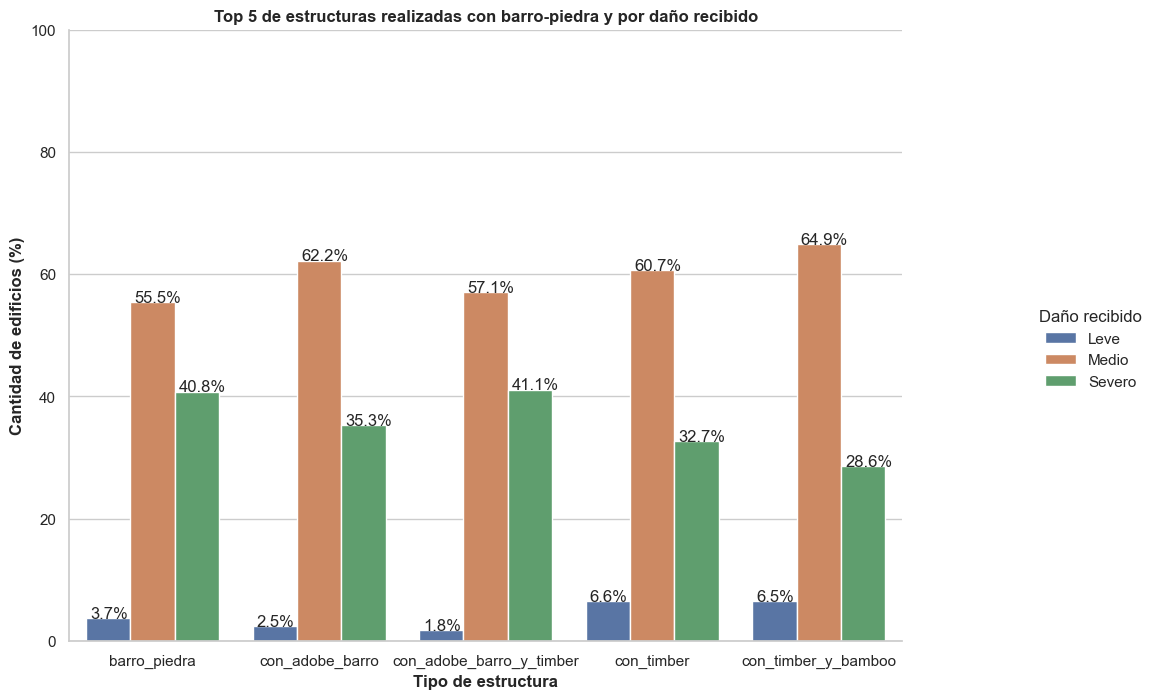

In [197]:
g = sns.catplot(x='superestructura', y='porcentaje', hue='damage_grade', kind='bar', data=top_5_estructuras_y_daño_mud_stone, orient='v')
g.fig.set_size_inches(12, 7)
g._legend.set_title('Daño recibido')
g.ax.set_ylim(0, 100)
new_labels = ['Leve', 'Medio', 'Severo']
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.025
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('Cantidad de edificios (%)', weight='bold')
plt.xlabel("Tipo de estructura", weight='bold')
plt.title("Top 5 de estructuras realizadas con barro-piedra y por daño recibido", weight='bold')
plt.show(g)

Dentro del grupo de construcciones fabricadas con barro-piedra, podemos ver que aquellas estructuras construidas con solamente barro-piedra y aquellas con barro-piedra-adobe-timber fueron las más afectadas. Por otro lado, las construcciones que fueron fabricadas con timber son las que menos daño severo y mayor daño leve recibieron. Esto tiene sentido ya que el timber es un material que suele ser resistente a daños sismicos. Sin embargo,  el caso de barro-piedra-adobe-timber nos puede indicar que el nivel de intensidad de los terremotos que afectaron a ese tipo de estructuras fueron lo suficientemente fuerte como para dañarlos, pese a tener una mayor cantidad de estructuras diversas.

In [198]:
# Selecciono solo los casos en donde NO tenga mud_mortar_stone
cantidad_por_tipo_y_danio_sin_mud_stone = top_estructuras.loc[top_estructuras['mud_mortar_stone'] == 0, :]\
                            .groupby(['superestructura', 'damage_grade']).agg({'superestructura': 'count'})\
                            .rename(columns={'superestructura': 'cantidad'})
cantidad_por_tipo_y_danio_sin_mud_stone['porcentaje'] = (cantidad_por_tipo_y_danio_sin_mud_stone / (cantidad_por_tipo_y_danio_sin_mud_stone.groupby(level=0).transform("sum"))) * 100
cantidad_por_tipo_y_danio_sin_mud_stone.reset_index(inplace=True)
cantidad_por_tipo_y_danio_sin_mud_stone.head()

,superestructura,damage_grade,cantidad,porcentaje
0,adobe_mud,1,280,2.44
1,adobe_mud,2,6711,58.57
2,adobe_mud,3,4467,38.99
3,adobe_mud_and_bamboo,1,7,7.07
4,adobe_mud_and_bamboo,2,53,53.54


In [199]:
aux = top_estructuras.loc[top_estructuras['mud_mortar_stone'] == 0, :]['superestructura'].value_counts()
aux

cement_mortar_brick                                        15031
adobe_mud                                                  11458
timber                                                      7803
timber_and_bamboo                                           4357
cement_mortar_brick_and_timber                              2121
adobe_mud_and_timber                                        1854
bamboo                                                      1116
adobe_mud_and_timber_and_bamboo                              897
cement_mortar_brick_and_adobe_mud                            491
cement_mortar_brick_and_timber_and_bamboo                    353
cement_mortar_brick_and_adobe_mud_and_timber                 313
adobe_mud_and_bamboo                                          99
cement_mortar_brick_and_bamboo                                76
cement_mortar_brick_and_adobe_mud_and_timber_and_bamboo       65
cement_mortar_brick_and_adobe_mud_and_bamboo                   3
Name: superestructura, dt

In [200]:
top_5_sin_mud_stone = aux[:5].index.tolist()
top_5_estructuras_y_daño_sin_mud_stone = cantidad_por_tipo_y_danio_sin_mud_stone.loc[cantidad_por_tipo_y_danio_sin_mud_stone['superestructura'].isin(top_5_sin_mud_stone), :]
top_5_estructuras_y_daño_sin_mud_stone.head()

,superestructura,damage_grade,cantidad,porcentaje
0,adobe_mud,1,280,2.44
1,adobe_mud,2,6711,58.57
2,adobe_mud,3,4467,38.99
15,cement_mortar_brick,1,6152,40.93
16,cement_mortar_brick,2,8237,54.80


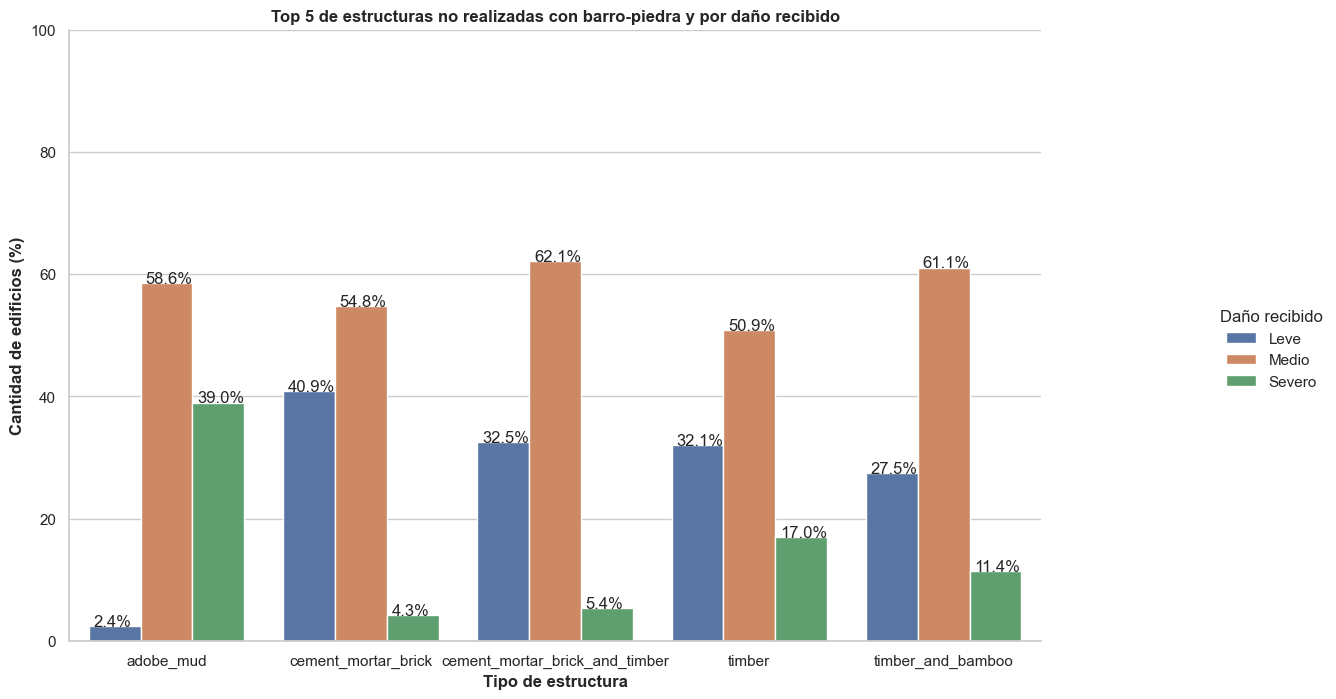

In [203]:
g = sns.catplot(x='superestructura', y='porcentaje', hue='damage_grade', kind='bar', data=top_5_estructuras_y_daño_sin_mud_stone, orient='v')
g.fig.set_size_inches(14, 7)
g._legend.set_title('Daño recibido')
g.ax.set_ylim(0, 100)
new_labels = ['Leve', 'Medio', 'Severo']
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.025
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('Cantidad de edificios (%)', weight='bold')
plt.xlabel("Tipo de estructura", weight='bold')
plt.title("Top 5 de estructuras no realizadas con barro-piedra y por daño recibido", weight='bold')
plt.show(g)

Si dejamos afuera a las viviendas de barro-piedra, vemos una vez mas que el timber es uno de los materiales importantes a la hora de reducir los daños recibidos. Al mismo tiempo, se observa que el cemento-ladrillo es muchisimo mejor que barro-piedra, siendo este ultimo mas propicio a recibir peores daños sismicos. Por otro lado, se ve que adobe-barro tiene un comportamiento similar a barro-piedra en cuanto a los 3 niveles de daños comparados.

Es de suma importancia aclarar que, en funcion a la cantidad de datos registrados, se dejo de lado en esta comparacion a 3 tipos de edificaciones que, a priori, serían las viviendas más y menos resistentes daños sismico. Los 3 tipos mencionados se compararan a continuacion

In [220]:
# Que pasa si comparamos aquellas con concreto reforzado no-diseñado/diseñado y con viviendas construidas con piedras?
for_comparison = ['has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_stone_flag']
edificios_con_stone_y_rc = df_buildings.loc[(df_buildings['has_superstructure_stone_flag'] == 1) |\
                                                   (df_buildings['has_superstructure_rc_engineered'] == 1) |\
                                                   (df_buildings['has_superstructure_rc_non_engineered'] == 1), for_comparison]

In [221]:
edificios_con_stone_y_rc['superestructura'] = edificios_con_stone_y_rc.idxmax(axis=1)
edificios_con_stone_y_rc['superestructura'] = edificios_con_stone_y_rc['superestructura'].map(lambda x: x.replace('has_superstructure_', ''))
edificios_con_stone_y_rc = edificios_con_stone_y_rc.join(df_buildings.loc[:, ['damage_grade']], how='inner', on='building_id')
edificios_con_stone_y_rc.head()

,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_stone_flag,superestructura,damage_grade
building_id,,,,,
605134,0,0,1,stone_flag,3
306024,0,0,1,stone_flag,2
440102,1,0,0,rc_non_engineered,1
877361,0,0,1,stone_flag,2
288541,0,1,0,rc_engineered,1


In [224]:
agrupado_por_daño_y_estructura = edificios_con_stone_y_rc.groupby(['superestructura', 'damage_grade']).agg({'superestructura': 'count'})\
                            .rename(columns={'superestructura': 'cantidad'})
agrupado_por_daño_y_estructura['porcentaje'] = (agrupado_por_daño_y_estructura / (agrupado_por_daño_y_estructura.groupby(level=0).transform("sum"))) * 100
agrupado_por_daño_y_estructura.reset_index(inplace=True)
agrupado_por_daño_y_estructura.head()

,superestructura,damage_grade,cantidad,porcentaje
0,rc_engineered,1,2596,64.29
1,rc_engineered,2,1371,33.95
2,rc_engineered,3,71,1.76
3,rc_non_engineered,1,3857,34.75
4,rc_non_engineered,2,5832,52.55


In [225]:
agrupado_por_daño_y_estructura

,superestructura,damage_grade,cantidad,porcentaje
0,rc_engineered,1,2596,64.29
1,rc_engineered,2,1371,33.95
2,rc_engineered,3,71,1.76
3,rc_non_engineered,1,3857,34.75
4,rc_non_engineered,2,5832,52.55
5,rc_non_engineered,3,1410,12.70
6,stone_flag,1,165,1.95
7,stone_flag,2,4232,49.93
8,stone_flag,3,4079,48.12


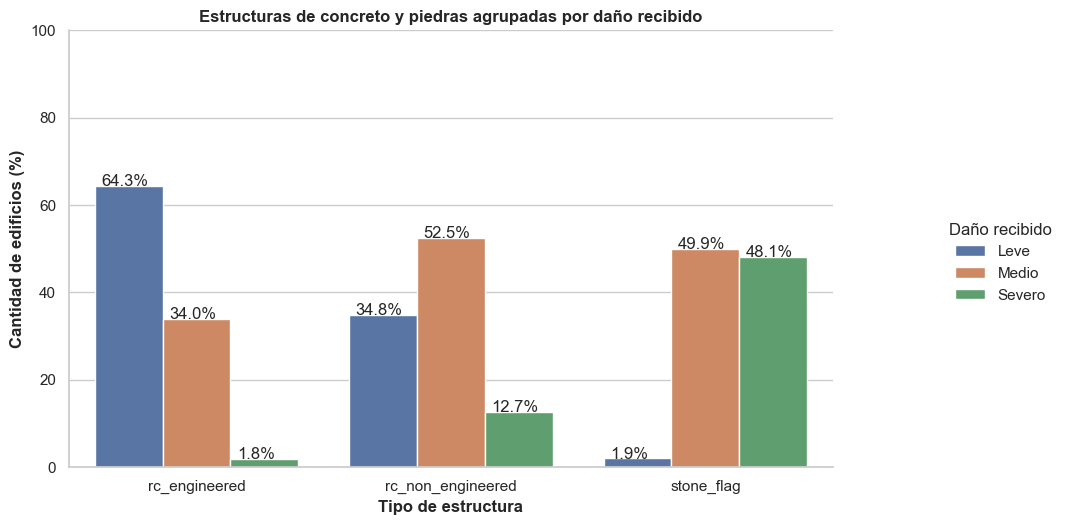

In [227]:
g = sns.catplot(x='superestructura', y='porcentaje', hue='damage_grade', kind='bar', data=agrupado_por_daño_y_estructura, orient='v')
g.fig.set_size_inches(11, 5)
g._legend.set_title('Daño recibido')
new_labels = ['Leve', 'Medio', 'Severo']
g.ax.set_ylim(0, 100)
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.025
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('Cantidad de edificios (%)', weight='bold')
plt.xlabel("Tipo de estructura", weight='bold')
plt.title("Estructuras de concreto y piedras agrupadas por daño recibido", weight='bold')
plt.show(g)

Es evidente que dentro de este pequeño grupo, en concordancia con nuestra hipotesis, aquellas edificaciones con concreto reforzado diseñado son las que menos daños sufrieron mientras que aquellas fabricadas con solamente piedra fueron las que más daño recibieron.

### ¿Los edificios con menor antiguedad sufrieron menos daño?

In [228]:
bins = [0, 50, 100, 150, 300, 500, 600, 700, 800, 900, 950]
age_by_bins = df_buildings['age'].value_counts(bins=bins).to_frame()
age_by_bins = age_by_bins.reset_index().rename(columns={'index': 'rango_antiguedad', 'age':'cantidad'})
age_by_bins = age_by_bins.loc[age_by_bins['cantidad'] > 0]
age_by_bins

,rango_antiguedad,cantidad
0,"(-0.001, 50.0]",242457
1,"(50.0, 100.0]",16020
2,"(100.0, 150.0]",595
3,"(150.0, 300.0]",139


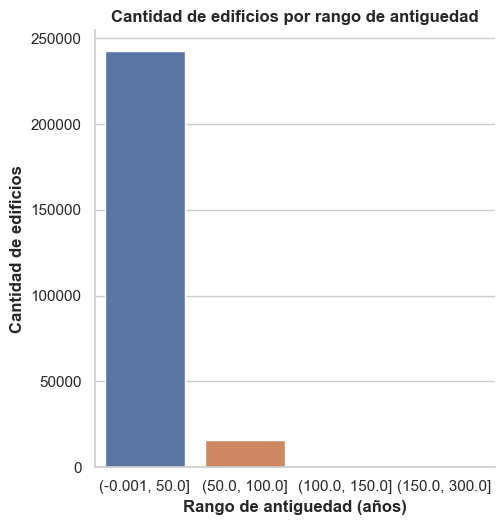

In [229]:
g = sns.catplot(x='rango_antiguedad', y='cantidad', kind='bar', data=age_by_bins, orient='v')
plt.ylabel("Cantidad de edificios", weight='bold')
plt.xlabel('Rango de antiguedad (años)', weight='bold')
plt.title("Cantidad de edificios por rango de antiguedad", weight='bold')
plt.show(g)

In [230]:
# Nos quedamos con los edificios con una antiguedad menor a 50 años para comparar debido a la poca cantidad de datos para age >= 50.
age_under_50 = df_buildings.loc[df_buildings['age'] <= 50, ['age', 'damage_grade']]
age_under_50 = age_under_50.groupby(['age', 'damage_grade']).agg({'damage_grade': 'count'})\
                            .rename(columns={'damage_grade': 'cantidad'})
age_under_50['porcentaje'] = (age_under_50 / (age_under_50.groupby(level=0).transform("sum"))) * 100
age_under_50.reset_index(inplace=True)

In [231]:
age_under_50.head()

,age,damage_grade,cantidad,porcentaje
0,0,1,7213,27.70
1,0,2,12721,48.85
2,0,3,6107,23.45
3,5,1,5590,16.59
4,5,2,19030,56.47


In [233]:
# Nos quedamos con los edificios con antiguedad mayor a 100
age_to_select = [100, 120, 150, 200, 995]
age_over_100 = df_buildings.loc[df_buildings['age'].isin(age_to_select), ['age', 'damage_grade']]
age_over_100 = age_over_100.groupby(['age', 'damage_grade']).agg({'damage_grade': 'count'})\
                            .rename(columns={'damage_grade': 'cantidad'})
age_over_100['porcentaje'] = (age_over_100 / (age_over_100.groupby(level=0).transform("sum"))) * 100
age_over_100.reset_index(inplace=True)

In [234]:
age_over_100

,age,damage_grade,cantidad,porcentaje
0,100,1,10,0.73
1,100,2,911,66.79
2,100,3,443,32.48
3,120,1,2,1.11
4,120,2,98,54.44
5,120,3,80,44.44
6,150,1,1,0.70
7,150,2,97,68.31
8,150,3,44,30.99
9,200,1,3,2.83


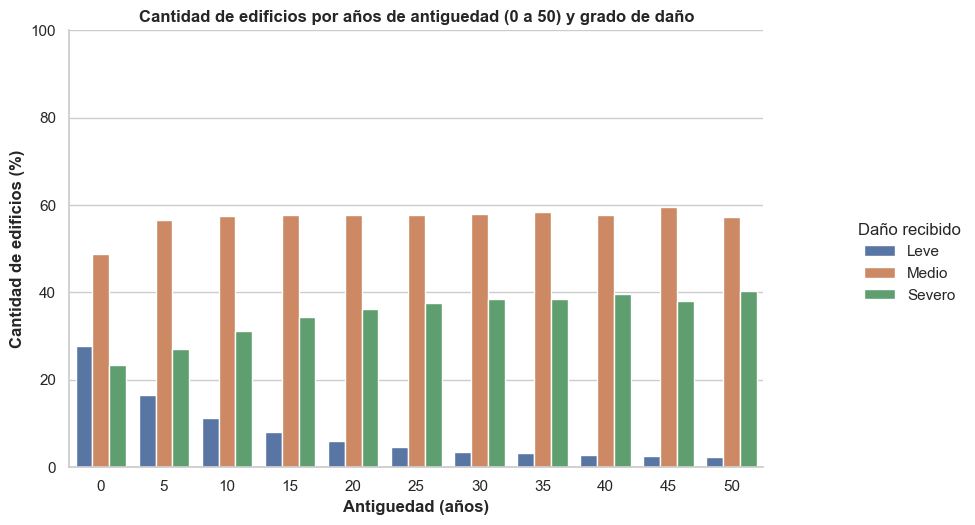

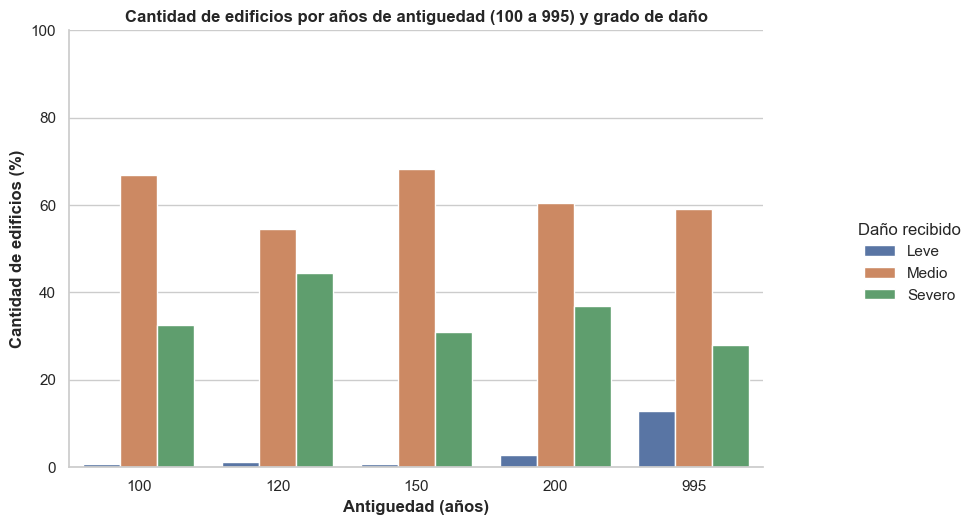

In [255]:
def plot_bar_pct(df, title):
    g = sns.catplot(x='age', y='porcentaje', hue='damage_grade', kind='bar', data=df, orient='v')
    g.fig.set_size_inches(10, 5)
    g._legend.set_title('Daño recibido')
    g.ax.set_ylim(0, 100)
    new_labels = ['Leve', 'Medio', 'Severo']
    for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
    plt.ylabel("Cantidad de edificios (%)", weight='bold')
    plt.xlabel('Antiguedad (años)', weight='bold')
    plt.title(title, weight='bold')
    plt.show(g)

plot_bar_pct(age_under_50, "Cantidad de edificios por años de antiguedad (0 a 50) y grado de daño")
plot_bar_pct(age_over_100, "Cantidad de edificios por años de antiguedad (100 a 995) y grado de daño")

Para el rango de 0-50 años de antiguedad, se puede ver que arriba del 50% de los edificios sufrieron un grado de daño de nivel medio, mientras que un porcentaje mayor al 30% sufrieron daño severo. Es interesante observar como a medida que la antiguedad va aumentando, la cantidad de edificios que sufrieron daños leves va disminuyendo al mismo tiempo que la cantidad de viviendas que sufrieron un daño grave va aumentando. 

Si analizamos para aquellos edificios con una antiguedad mayor a 100, podemos ver que esta tendencia se sigue manteniendo. Sin embargo, aquellos edificios con una antiguedad de 995 años tienen un comportamiento similar a los edificios con antiguedad entre 0 y 10 años. Esto puede atribuirse a que dichos edificios pueden ser historicos con una constante remodelacion y/o reacondicionamiento con el fin de hacerlos mas resistentes a daños sismicos.

En general podemos decir que los edificios con menor antiguedad sufrieron menos daño.

### ¿Los edificios con mayor cantidad de pisos sufrieron un mayor daño?

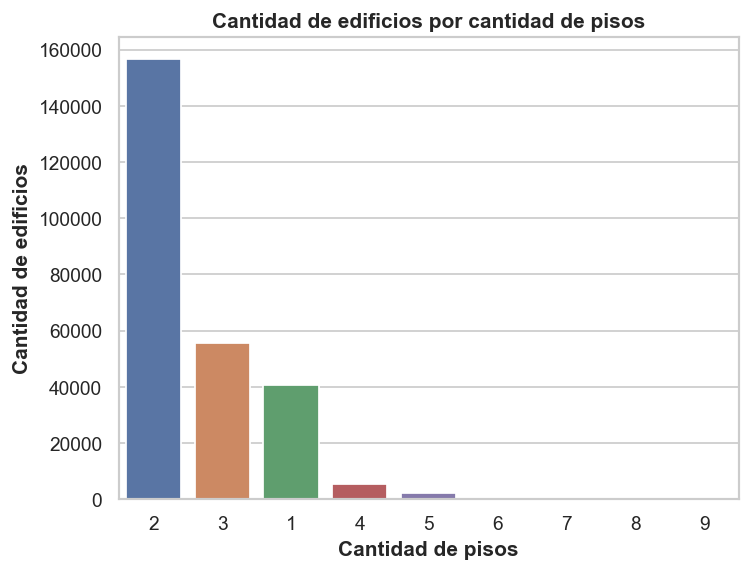

In [259]:
plt.figure(dpi=125)
sns.countplot(x='count_floors_pre_eq', data=df_buildings, order=df_buildings['count_floors_pre_eq'].value_counts()[:].index, orient='v')
plt.ylabel("Cantidad de edificios", weight='bold')
plt.xlabel("Cantidad de pisos", weight='bold')
plt.title("Cantidad de edificios por cantidad de pisos", weight='bold')
plt.show()

In [260]:
cantidad_por_pisos_y_danio = df_buildings.loc[:, ['count_floors_pre_eq', 'damage_grade']]
cantidad_por_pisos_y_danio = cantidad_por_pisos_y_danio.groupby(['count_floors_pre_eq', 'damage_grade']).agg({'damage_grade': 'count'})\
                            .rename(columns={'damage_grade': 'cantidad'})
cantidad_por_pisos_y_danio['porcentaje'] = (cantidad_por_pisos_y_danio / (cantidad_por_pisos_y_danio.groupby(level=0).transform("sum"))) * 100
cantidad_por_pisos_y_danio.reset_index(inplace=True)

In [261]:
cantidad_por_pisos_y_danio.head()

,count_floors_pre_eq,damage_grade,cantidad,porcentaje
0,1,1,8969,22.18
1,1,2,20798,51.43
2,1,3,10674,26.39
3,2,1,12593,8.04
4,2,2,93968,60.00


In [262]:
# Solo analizamos por el top 3 de cantidad de pisos
top_3_cant_pisos = cantidad_por_pisos_y_danio['count_floors_pre_eq'].value_counts(normalize=True)[0:3].index.tolist()
top_3_cant_pisos = cantidad_por_pisos_y_danio.loc[cantidad_por_pisos_y_danio['count_floors_pre_eq'].isin(top_3_cant_pisos), :]
top_3_cant_pisos

,count_floors_pre_eq,damage_grade,cantidad,porcentaje
0,1,1,8969,22.18
1,1,2,20798,51.43
2,1,3,10674,26.39
3,2,1,12593,8.04
4,2,2,93968,60.00
5,2,3,50062,31.96
6,3,1,2537,4.56
7,3,2,28479,51.21
8,3,3,24601,44.23


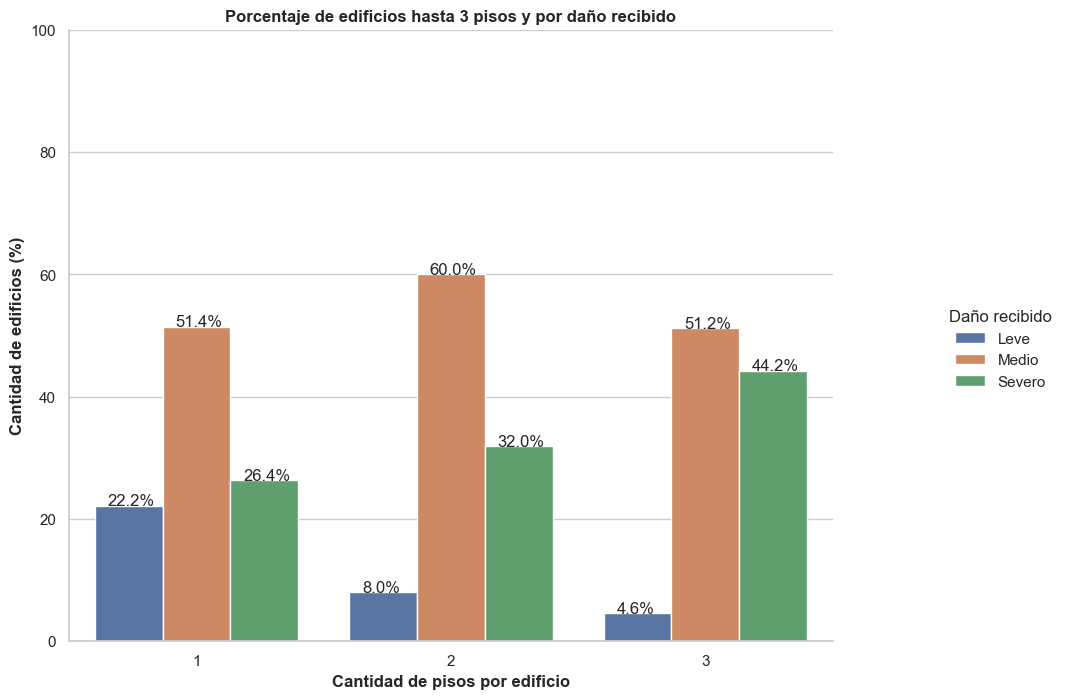

In [242]:
g = sns.catplot(x='count_floors_pre_eq', y='porcentaje', hue='damage_grade', kind='bar', data=top_3_cant_pisos, orient='v')
g.fig.set_size_inches(11, 7)
g._legend.set_title('Daño recibido')
g.ax.set_ylim(0, 100)
new_labels = ['Leve', 'Medio', 'Severo']
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.05
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('Cantidad de edificios (%)', weight='bold')
plt.xlabel("Cantidad de pisos por edificio", weight='bold')
plt.title("Porcentaje de edificios hasta 3 pisos y por daño recibido", weight='bold')
plt.show(g)

Si solo nos quedamos con las viviendas que tienen hasta 3 pisos, se observa claramente que a mayor cantidad de pisos, mayor fue el daño recibido. Es notable ver que la diferencia del 14% entre el porcentaje de edificios de 1 y 2 pisos proviene principalmente en la disminución de viviendas que sufrieron un daño leve, aumentando más la cantidad de edificios que sufrieron un daño medio que los que sufrieron un daño severo. Mientras que en si comparamos las viviendas con 2 y 3 pisos, vemos que se disminuye tanto las viviendas con daño leve y medio para así aumentar en 12% aproximadamente las viviendas con daño severo.
Todo esto puede deberse a que dada las condiciones socioeconomicas de Nepal, y viendo que predominan las viviendas fabricadas, parcial o totalmente, con barro-piedra y fabricadas con timber; sumado a que probablemente no se cumplan las condiciones minimas necesarias para que dichas viviendas sean resistentes a un daño sismico, el aumento de pisos en una vivienda genera condiciones para que dicha vivienda sufra daños mayores.


In [271]:
solo_pisos_1_a_3 = df_buildings.loc[(df_buildings['count_floors_pre_eq'] >= 1) & (df_buildings['count_floors_pre_eq'] <= 3), :]
solo_pisos_1_a_3.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
28830,2,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
94947,3,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
590882,2,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
201944,3,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [272]:
solo_pisos_1_a_3 = solo_pisos_1_a_3['plan_configuration'].value_counts()

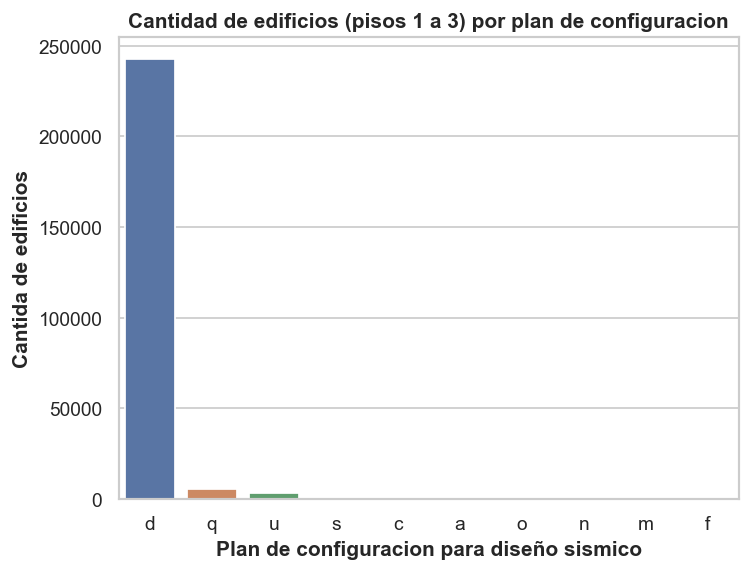

In [276]:
plt.figure(dpi=125)
sns.barplot(x=solo_pisos_1_a_3.index, y=solo_pisos_1_a_3.values, orient='v')
plt.ylabel('Cantida de edificios', weight='bold')
plt.xlabel('Plan de configuracion para diseño sismico', weight='bold')
plt.title('Cantidad de edificios (pisos 1 a 3) por plan de configuracion', weight='bold')
plt.show()

Como presuponiamos, para las viviendas con una cantidad de pisos entre 1 y 3, el plan de configuraicon para diseño sismico es del tipo 'd'. Si bien este tipo de dato está ofuscado y puede no representar un mismo valor, entendemos que esta categoria es aquella en donde las viviendas nulo o poco diseño para resistir daños sismicos.